In [ ]:
#Stellar Classification Dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('StarClassificationDataset.csv')

/var/folders/wv/6mym4l8x2m103zryzwg2jgzw0000gn/T/ipykernel_13287/676318667.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('StarClassificationDataset.csv')


In [5]:
df

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


In [7]:
df_cleaned = df.drop(columns=['object_ID', 'spec_obj_ID', 'alpha', 'run_ID'])
df_cleaned = df_cleaned.dropna()


In [8]:
df_cleaned['class'] = df_cleaned['class'].astype('category').cat.codes


In [9]:
X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)


In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



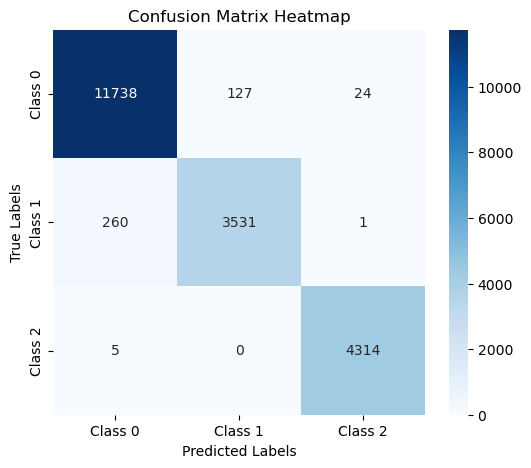

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [15]:
#California Housing Prices

In [89]:
df1 = pd.read_csv('housing.csv')

In [41]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [100]:
n = len(df1)
num_bins = int(np.ceil(1 + np.log2(n)))  # Sturges' Rule
print(f"Number of bins according to Sturges' Rule: {num_bins}")

Number of bins according to Sturges' Rule: 16


In [101]:
df1['price_bin'] = pd.cut(df1['median_house_value'], bins=num_bins, labels=False)
print(df1['price_bin'].value_counts())

4     2897
5     2444
2     2351
3     2318
6     1868
1     1597
7     1587
8     1279
15    1138
10     770
9      750
11     639
12     370
13     304
14     227
0      101
Name: price_bin, dtype: int64


In [102]:
X = df1.drop(columns=['median_house_value'])
y = df1['median_house_value']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df1['price_bin'], random_state=42)


In [104]:
X_train = X_train.drop(columns=['price_bin'])
X_test = X_test.drop(columns=['price_bin'])


In [105]:
print(pd.cut(y_train, bins=num_bins).value_counts(normalize=True))


(136249.5, 166562.125]     0.140383
(166562.125, 196874.75]    0.118399
(75624.25, 105936.875]     0.113917
(105936.875, 136249.5]     0.112282
(196874.75, 227187.375]    0.090480
(45311.625, 75624.25]      0.077398
(227187.375, 257500.0]     0.076914
(257500.0, 287812.625]     0.061955
(469688.375, 500001.0]     0.055111
(318125.25, 348437.875]    0.037306
(287812.625, 318125.25]    0.036337
(348437.875, 378750.5]     0.030947
(378750.5, 409063.125]     0.017926
(409063.125, 439375.75]    0.014717
(439375.75, 469688.375]    0.011022
(14513.998, 45311.625]     0.004906
Name: median_house_value, dtype: float64


In [106]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoder.fit(X_train[['ocean_proximity']])  

X_train_encoded = encoder.transform(X_train[['ocean_proximity']]).toarray()
X_test_encoded = encoder.transform(X_test[['ocean_proximity']]).toarray()

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

X_test_encoded_df = X_test_encoded_df.reindex(columns=X_train_encoded_df.columns, fill_value=0)


In [107]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [108]:
X_train = X_train.drop(columns=['ocean_proximity'])
X_test = X_test.drop(columns=['ocean_proximity'])

X_train_final = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df], axis=1)


In [109]:
imputer = SimpleImputer(strategy="median")
X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

print(X_train_final.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [110]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

In [111]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [112]:
ridge_model.fit(X_train_final, y_train_scaled)
lasso_model.fit(X_train_final, y_train_scaled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [113]:
ridge_preds = scaler_y.inverse_transform(ridge_model.predict(X_test_final).reshape(-1, 1)).flatten()
lasso_preds = scaler_y.inverse_transform(lasso_model.predict(X_test_final).reshape(-1, 1)).flatten()


In [117]:
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

In [118]:
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse=np.sqrt(lasso_mse)

In [119]:
print(f"Ridge Regression - MAE: {ridge_mae}, MSE: {ridge_mse},RMSE:{ridge_rmse}")
print(f"Lasso Regression - MAE: {lasso_mae}, MSE: {lasso_mse},RMSE:{lasso_rmse}")


Ridge Regression - MAE: 0.24576200091534295, MSE: 0.103881538335571,RMSE:0.32230659058661987
Lasso Regression - MAE: 0.28012043812943244, MSE: 0.13040547168371655,RMSE:0.361116977839199


In [ ]:
#Ridge Regression performs better than Lasso Regression because:
#Lower MAE → Predictions are closer to the actual values.
#Lower MSE → Smaller overall errors, indicating a better fit.